<a href="https://colab.research.google.com/github/lemmynation/DataScienceEcosystem/blob/main/Copy_of_Churn_Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Files**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data Science Masters/2023-2024 Second Sem/Machine Learning/churn.csv'
df = pd.read_csv(path)

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.head(10)

Unnamed: 0 college  income  overage  leftover   house  handset_price  \
0           1    zero   31953        0         6  313378            161   
1           2     one   36147        0        13  800586            244   
2           3     one   27273      230         0  305049            201   
3           4    zero  120070       38        33  788235            780   
4           5     one   29215      208        85  224784            241   
5           6    zero  133728       64        48  632969            626   
6           7    zero   42052      224         0  697949            191   
7           8     one   84744        0        20  688098            357   
8           9    zero   38171        0         7  274218            190   
9          10    zero  105824      174        18  153560            687   

   over_15mins_calls_per_month  average_call_duration reported_satisfaction  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   
4                           21                      1            very_unsat   
5                            3                      2                 unsat   
6                           10                      5            very_unsat   
7                            0                      5            very_unsat   
8                            0                      5              very_sat   
9                           25                      4              very_sat   

  reported_usage_level considering_change_of_plan  leave  
0               little                         no   STAY  
1               little                considering   STAY  
2          very_little                    perhaps   STAY  
3            very_high                considering  LEAVE  
4               little              never_thought   STAY  
5                 high                         no   STAY  
6               little   actively_looking_into_it   STAY  
7               little                considering   STAY  
8               little   actively_looking_into_it   STAY  
9               little              never_thought  LEAVE

In [ ]:
df.columns

Index(['Unnamed: 0', 'college', 'income', 'overage', 'leftover', 'house',
       'handset_price', 'over_15mins_calls_per_month', 'average_call_duration',
       'reported_satisfaction', 'reported_usage_level',
       'considering_change_of_plan', 'leave'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   20000 non-null  int64 
 1   college                      20000 non-null  object
 2   income                       20000 non-null  int64 
 3   overage                      20000 non-null  int64 
 4   leftover                     20000 non-null  int64 
 5   house                        20000 non-null  int64 
 6   handset_price                20000 non-null  int64 
 7   over_15mins_calls_per_month  20000 non-null  int64 
 8   average_call_duration        20000 non-null  int64 
 9   reported_satisfaction        20000 non-null  object
 10  reported_usage_level         20000 non-null  object
 11  considering_change_of_plan   20000 non-null  object
 12  leave                        20000 non-null  object
dtypes: int64(8), object(5)
memory u

In [ ]:
df.shape

(20000, 13)

In [ ]:
df.describe()

Unnamed: 0    income  overage  leftover     house  handset_price  \
count    20000.00  20000.00 20000.00  20000.00  20000.00       20000.00   
mean     10000.50  80281.45    85.98     23.90 493155.26         389.62   
std       5773.65  41680.59    85.99     26.82 252407.88         213.82   
min          1.00  20007.00    -2.00      0.00 150002.00         130.00   
25%       5000.75  42217.00     0.00      0.00 263714.25         219.00   
50%      10000.50  75366.50    59.00     14.00 452259.50         326.00   
75%      15000.25 115881.75   179.00     41.00 702378.00         533.25   
max      20000.00 159983.00   335.00     89.00 999996.00         899.00   

       over_15mins_calls_per_month  average_call_duration  
count                     20000.00               20000.00  
mean                          8.00                   6.00  
std                           8.93                   4.40  
min                           0.00                   1.00  
25%                           1.00                   2.00  
50%                           4.00                   5.00  
75%                          15.00                  10.00  
max                          29.00                  15.00

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().any()

Unnamed: 0                     False
college                        False
income                         False
overage                        False
leftover                       False
house                          False
handset_price                  False
over_15mins_calls_per_month    False
average_call_duration          False
reported_satisfaction          False
reported_usage_level           False
considering_change_of_plan     False
leave                          False
dtype: bool

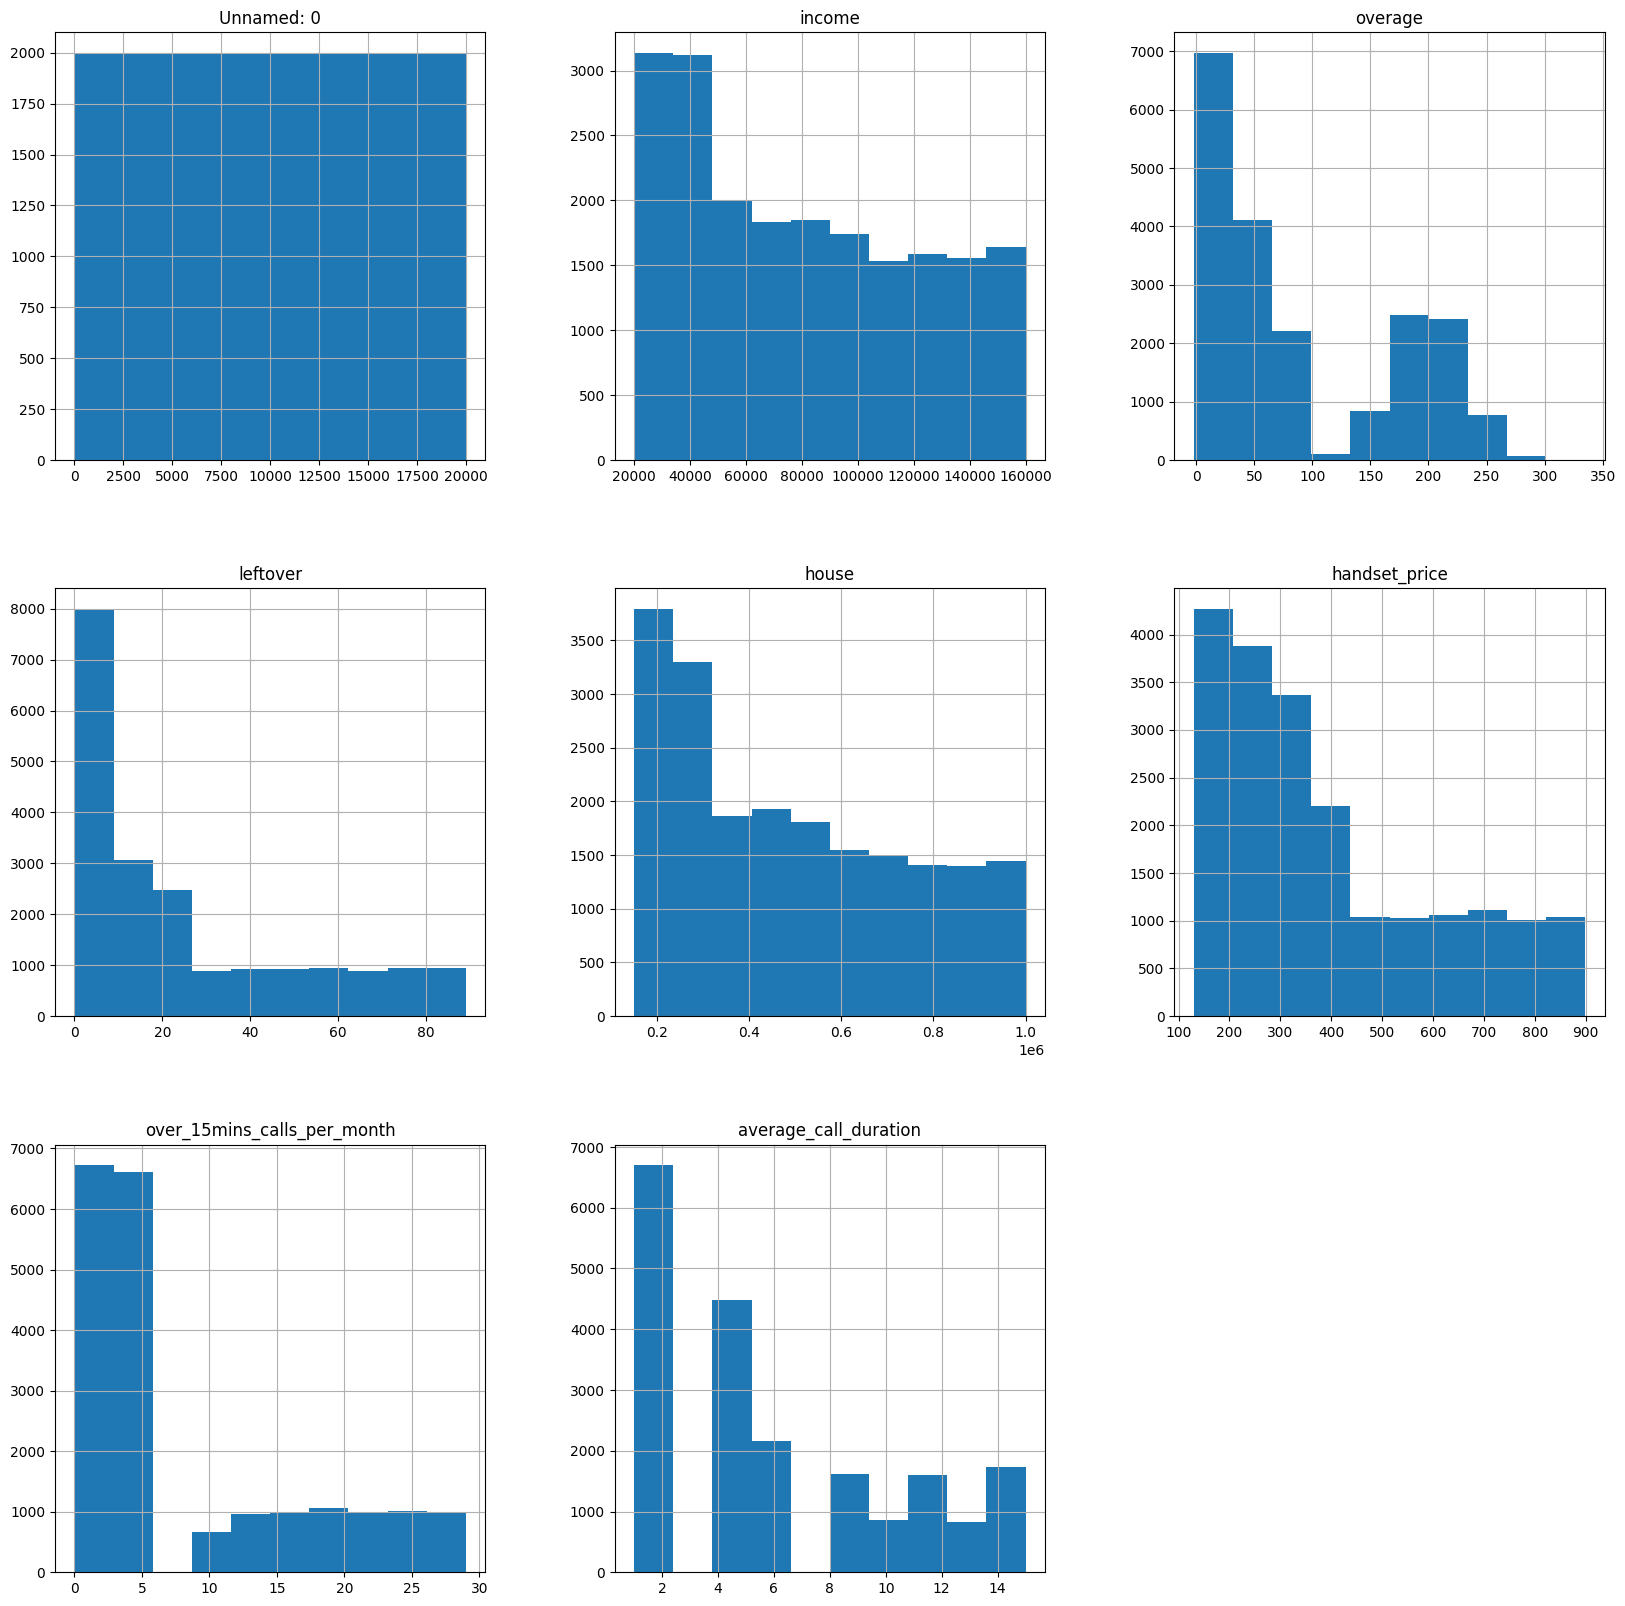

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

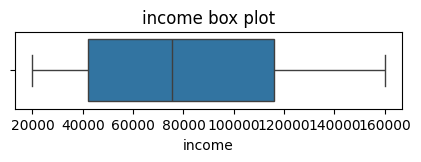

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['income'], fliersize=1)
plt.title('income box plot');

It highlights the concentration of incomes around **60,000 to 100,000**.


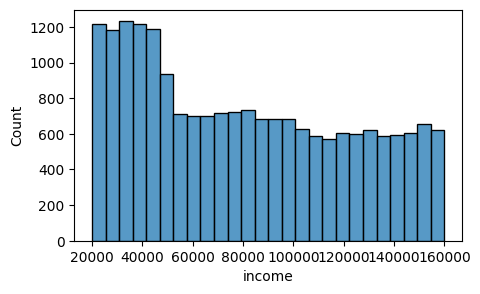

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['income'])
median = df['income'].median()

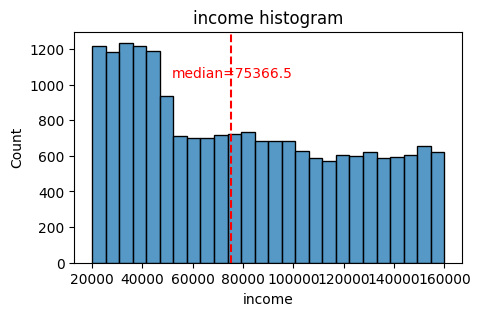

In [ ]:
histogrammer('income')

 Revealing a higher count of people with incomes in the lower range. This disparity provides insights into income inequality.

Text(0.5, 1.0, 'overage box plot')

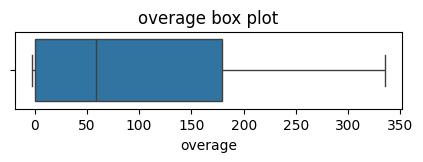

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['overage'], fliersize=1)
plt.title('overage box plot')

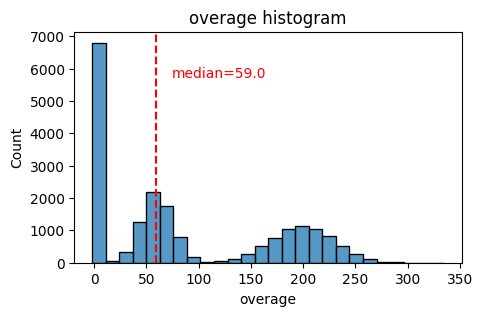

In [ ]:
histogrammer('overage')

Text(0.5, 1.0, 'left over box plot')

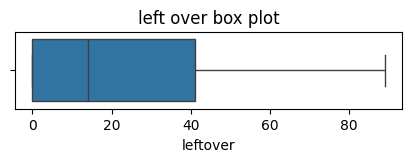

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['leftover'])
plt.title('left over box plot')

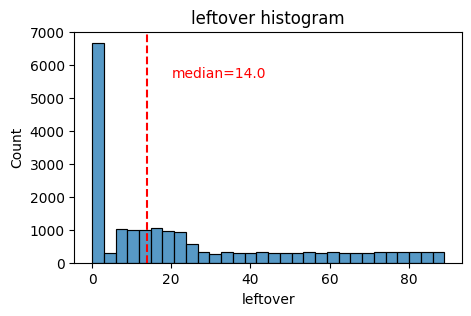

In [ ]:
histogrammer('leftover')

Text(0.5, 1.0, 'house box plot')

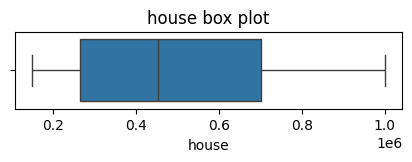

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['house'])
plt.title('house box plot')

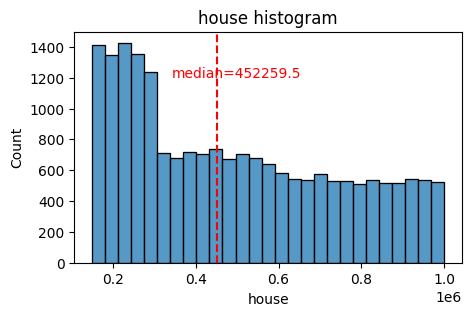

In [ ]:
histogrammer('house')

Text(0.5, 1.0, 'handset_price box plot')

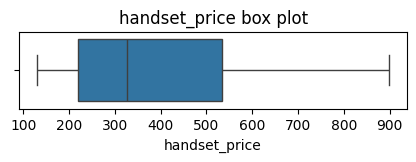

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['handset_price'])
plt.title('handset_price box plot')

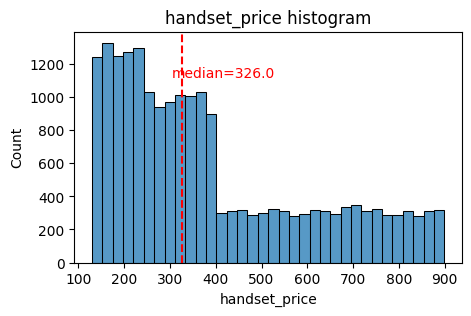

In [ ]:
histogrammer('handset_price')

Text(0.5, 1.0, 'Over 15mins calls per month boxplot')

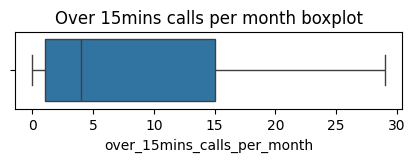

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['over_15mins_calls_per_month'])
plt.title('Over 15mins calls per month box plot')

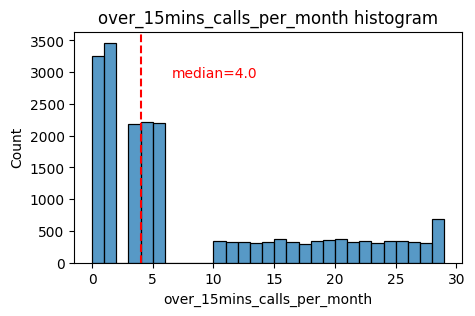

In [ ]:
histogrammer('over_15mins_calls_per_month')

The majority of call durations fall within the range of 0 to 5 minutes. This suggests that most calls are relatively short. The histogram exhibits a right-skewed distribution, with fewer calls having longer durations.

Text(0.5, 1.0, 'Average Call Duration Box Plot')

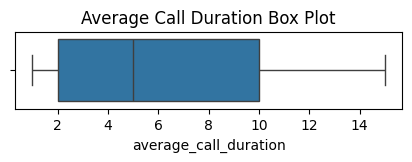

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['average_call_duration'])
plt.title('Average Call Duration Box Plot')

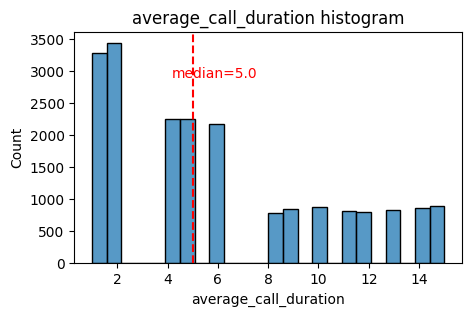

In [ ]:
histogrammer('average_call_duration')

It reveals a skewed distribution, with most data points concentrated below an overage of 100.

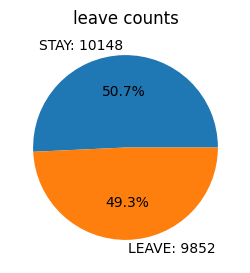

In [ ]:
fig = plt.figure(figsize=(3,3))
data=df['leave'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('leave counts');

**HANDLING OUTLIER**

In [ ]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [ ]:
for column in ['income', 'overage', 'leftover',
               'house', 'handset_price','over_15mins_calls_per_month','average_call_duration']:
               outlier_imputer(column, 0.95)

                   income | percentile: 0.95 | threshold: 151544.0
                  overage | percentile: 0.95 | threshold: 230.0
                 leftover | percentile: 0.95 | threshold: 80.0
                    house | percentile: 0.95 | threshold: 939777.9999999999
            handset_price | percentile: 0.95 | threshold: 825.0499999999993
over_15mins_calls_per_month | percentile: 0.95 | threshold: 26.0
    average_call_duration | percentile: 0.95 | threshold: 14.0


In [ ]:
df.describe()

Unnamed: 0    income  overage  leftover     house  handset_price  \
count    20000.00  20000.00 20000.00  20000.00  20000.00       20000.00   
mean     10000.50  80073.54    85.19     23.66 491638.04         387.73   
std       5773.65  41309.03    84.53     26.29 249581.30         209.72   
min          1.00  20007.00    -2.00      0.00 150002.00         130.00   
25%       5000.75  42217.00     0.00      0.00 263714.25         219.00   
50%      10000.50  75366.50    59.00     14.00 452259.50         326.00   
75%      15000.25 115881.75   179.00     41.00 702378.00         533.25   
max      20000.00 151544.00   230.00     80.00 939778.00         825.05   

       over_15mins_calls_per_month  average_call_duration  
count                     20000.00               20000.00  
mean                          7.90                   5.96  
std                           8.71                   4.32  
min                           0.00                   1.00  
25%                           1.00                   2.00  
50%                           4.00                   5.00  
75%                          15.00                  10.00  
max                          26.00                  14.00

In [ ]:
df.corr()

Unnamed: 0  income  overage  leftover  house  \
Unnamed: 0                         1.00    0.00    -0.01      0.01   0.01   
income                             0.00    1.00     0.00      0.01  -0.01   
overage                           -0.01    0.00     1.00     -0.00   0.00   
leftover                           0.01    0.01    -0.00      1.00   0.01   
house                              0.01   -0.01     0.00      0.01   1.00   
handset_price                     -0.01    0.73     0.00      0.00  -0.01   
over_15mins_calls_per_month        0.00    0.00     0.78     -0.01   0.01   
average_call_duration             -0.01   -0.01     0.00     -0.67  -0.01   

                             handset_price  over_15mins_calls_per_month  \
Unnamed: 0                           -0.01                         0.00   
income                                0.73                         0.00   
overage                               0.00                         0.78   
leftover                              0.00                        -0.01   
house                                -0.01                         0.01   
handset_price                         1.00                         0.00   
over_15mins_calls_per_month           0.00                         1.00   
average_call_duration                -0.00                         0.01   

                             average_call_duration  
Unnamed: 0                                   -0.01  
income                                       -0.01  
overage                                       0.00  
leftover                                     -0.67  
house                                        -0.01  
handset_price                                -0.00  
over_15mins_calls_per_month                   0.01  
average_call_duration                         1.00

**Duplicating Dataset**

In [ ]:
df_copy = df.copy(deep = True)

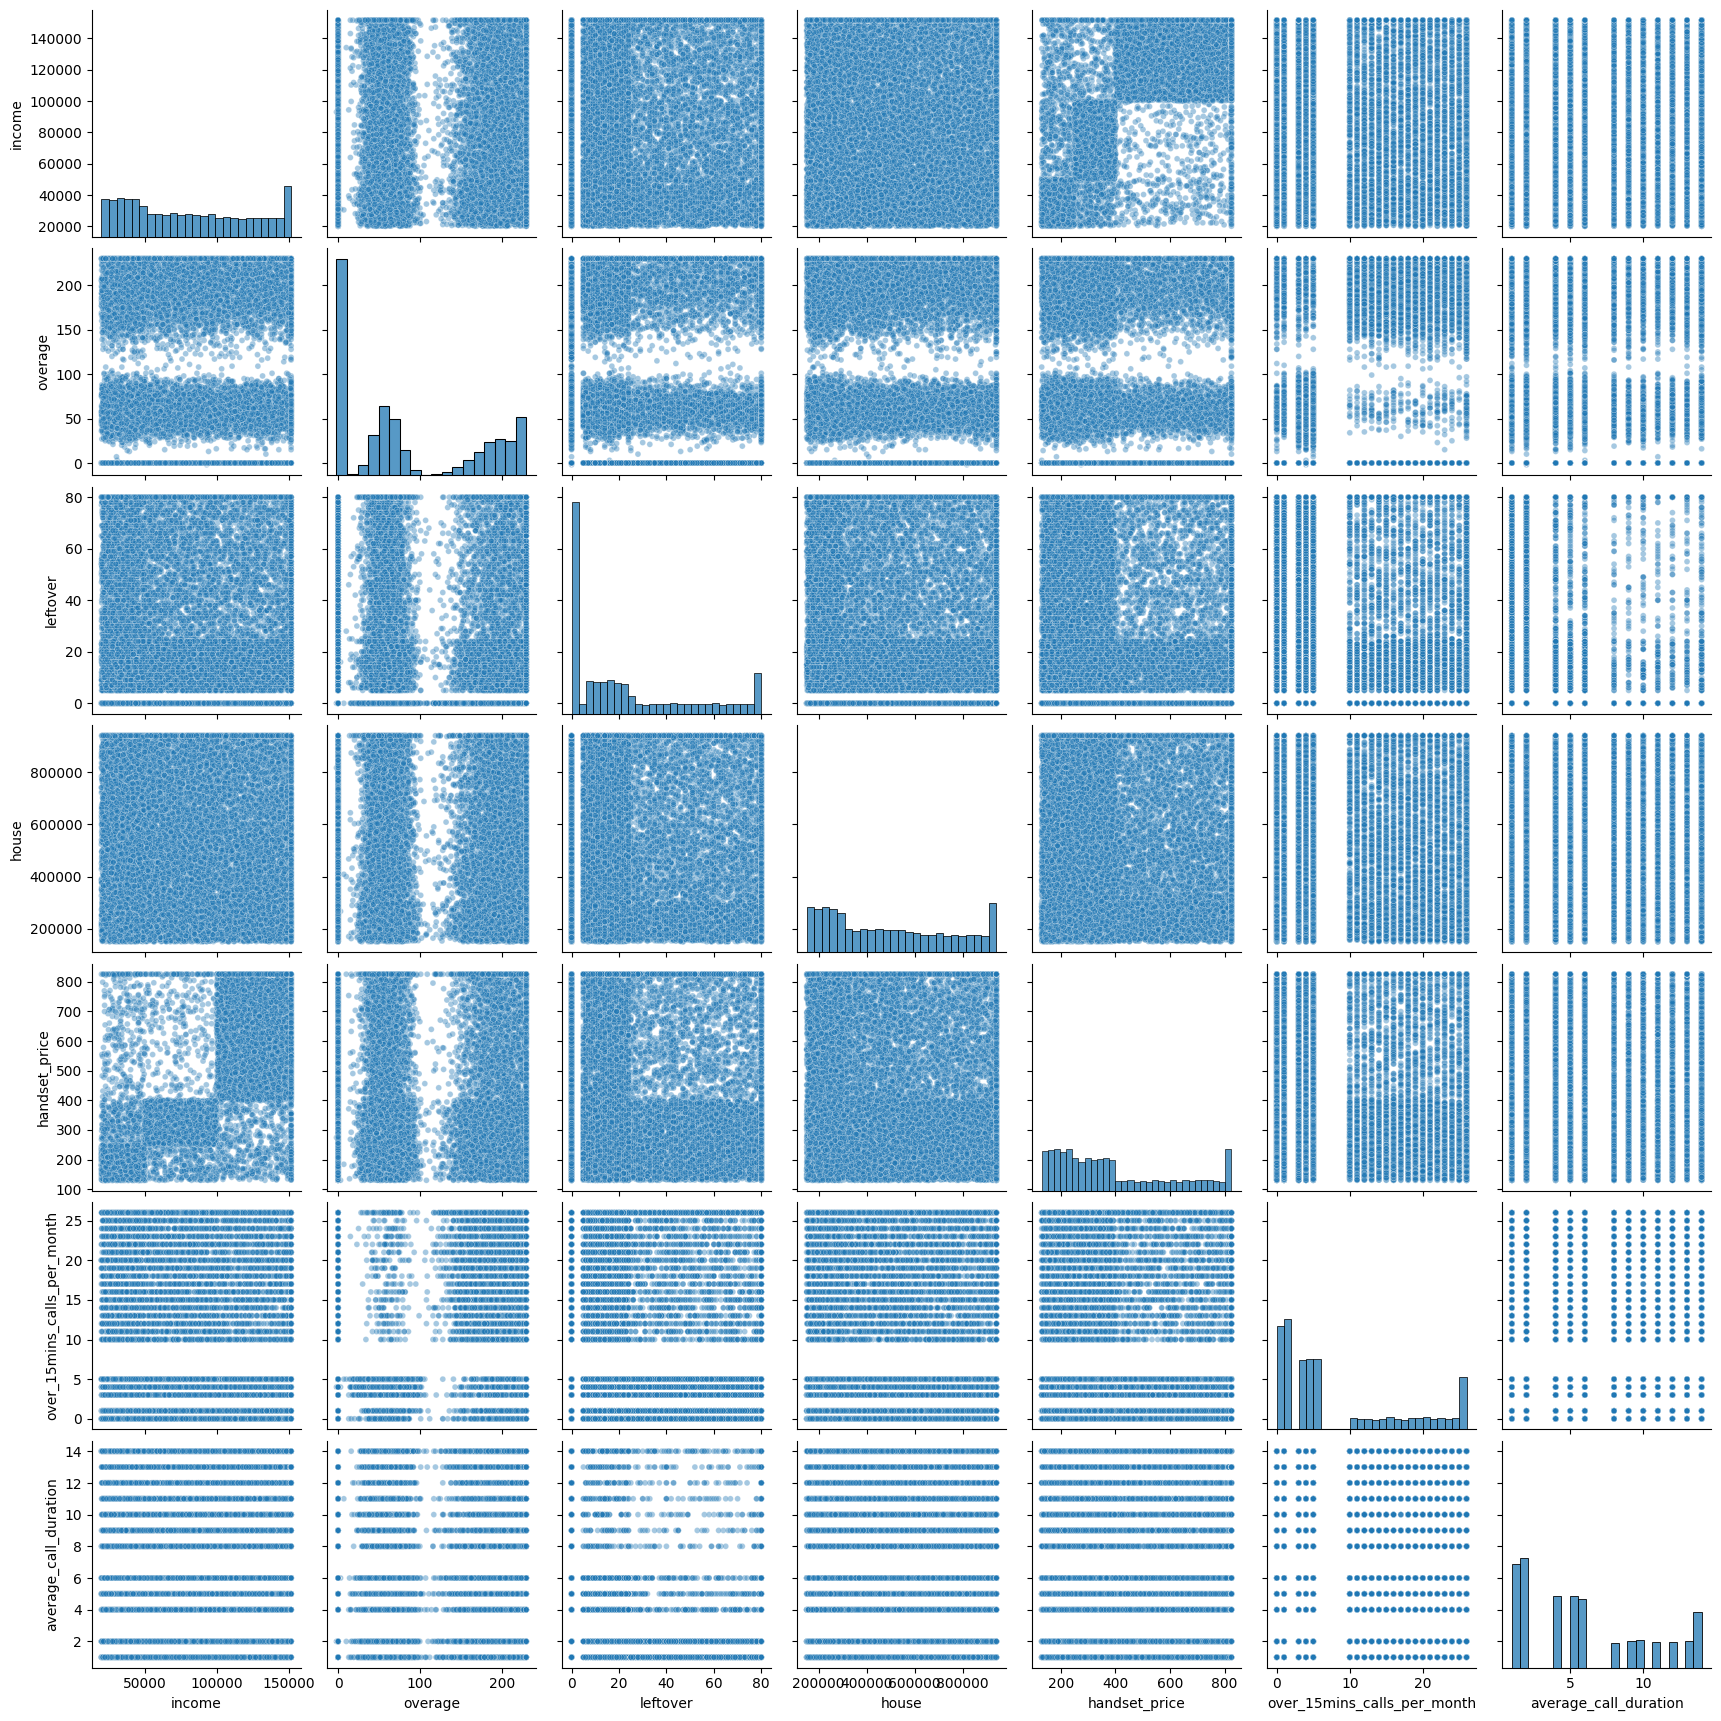

In [ ]:
sns.pairplot(df_copy[['income', 'overage', 'leftover','house','handset_price','over_15mins_calls_per_month','average_call_duration','leave']],
             plot_kws={'alpha':0.4, 'size':5},
             );

# **DATA TRANSFORMATION INCLUDING SMOTE**

**Variable Encoding**

In [ ]:
df_copy = pd.get_dummies(df_copy, drop_first=True)

In [ ]:
df_copy.head()

Unnamed: 0  income  overage  leftover     house  handset_price  \
0           1   31953        0         6 313378.00         161.00   
1           2   36147        0        13 800586.00         244.00   
2           3   27273      230         0 305049.00         201.00   
3           4  120070       38        33 788235.00         780.00   
4           5   29215      208        80 224784.00         241.00   

   over_15mins_calls_per_month  average_call_duration  college_zero  \
0                            0                      4             1   
1                            0                      6             0   
2                           16                     14             0   
3                            3                      2             1   
4                           21                      1             0   

   reported_satisfaction_sat  ...  reported_satisfaction_very_unsat  \
0                          0  ...                                 0   
1                          0  ...                                 0   
2                          0  ...                                 0   
3                          0  ...                                 0   
4                          0  ...                                 1   

   reported_usage_level_high  reported_usage_level_little  \
0                          0                            1   
1                          0                            1   
2                          0                            0   
3                          0                            0   
4                          0                            1   

   reported_usage_level_very_high  reported_usage_level_very_little  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 1   
3                               1                                 0   
4                               0                                 0   

   considering_change_of_plan_considering  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       0   

   considering_change_of_plan_never_thought  considering_change_of_plan_no  \
0                                         0                              1   
1                                         0                              0   
2                                         0                              0   
3                                         0                              0   
4                                         1                              0   

   considering_change_of_plan_perhaps  leave_STAY  
0                                   0           1  
1                                   0           1  
2                                   1           1  
3                                   0           0  
4                                   0           1  

[5 rows x 22 columns]

**Dropping Columns**

In [ ]:
df_copy = df_copy.drop(columns= 'Unnamed: 0')

In [ ]:
df_copy.head()

income  overage  leftover     house  handset_price  \
0   31953        0         6 313378.00         161.00   
1   36147        0        13 800586.00         244.00   
2   27273      230         0 305049.00         201.00   
3  120070       38        33 788235.00         780.00   
4   29215      208        80 224784.00         241.00   

   over_15mins_calls_per_month  average_call_duration  college_zero  \
0                            0                      4             1   
1                            0                      6             0   
2                           16                     14             0   
3                            3                      2             1   
4                           21                      1             0   

   reported_satisfaction_sat  reported_satisfaction_unsat  ...  \
0                          0                            1  ...   
1                          0                            1  ...   
2                          0                            1  ...   
3                          0                            1  ...   
4                          0                            0  ...   

   reported_satisfaction_very_unsat  reported_usage_level_high  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 1                          0   

   reported_usage_level_little  reported_usage_level_very_high  \
0                            1                               0   
1                            1                               0   
2                            0                               0   
3                            0                               1   
4                            1                               0   

   reported_usage_level_very_little  considering_change_of_plan_considering  \
0                                 0                                       0   
1                                 0                                       1   
2                                 1                                       0   
3                                 0                                       1   
4                                 0                                       0   

   considering_change_of_plan_never_thought  considering_change_of_plan_no  \
0                                         0                              1   
1                                         0                              0   
2                                         0                              0   
3                                         0                              0   
4                                         1                              0   

   considering_change_of_plan_perhaps  leave_STAY  
0                                   0           1  
1                                   0           1  
2                                   1           1  
3                                   0           0  
4                                   0           1  

[5 rows x 21 columns]

**Handling Imbalanced Datasets**

before Counter({1: 10148, 0: 9852})
after Counter({1: 10148, 0: 10148})


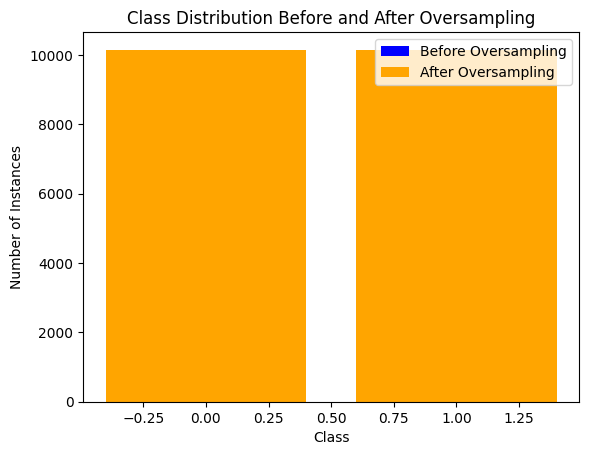

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt


x = df_copy.drop(columns=['leave_STAY'])
y = df_copy.leave_STAY # contains the target variable

# The output will show the class distribution before applying SMOTE.
print('before',Counter(y))

smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print('after', Counter(smotey))

plt.bar(Counter(y).keys(), Counter(y).values(), color='blue', label='Before Oversampling')
plt.bar(Counter(smotey).keys(), Counter(smotey).values(), color='orange', label='After Oversampling')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Oversampling')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split



xtrain_, xtest_, ytrain_, ytest_ = train_test_split(smotex, smotey, test_size=0.2)

In [ ]:
def get_score(names, models, _X_train, _y_train, _X_test, _y_test, index):
    res = {' ':[index]} # key and a list containing the provided index as the value.
    for n, model in enumerate(models):
      trained = model.fit(_X_train, _y_train)
      score = trained.score(_X_test, _y_test)
      res[names[n]] = score
    df = pd.DataFrame(res).set_index(' ') # Converts the res dictionary into a DataFrame using pandas (pd.DataFrame(res))
    return df

In [ ]:
def get_validators():
  NN = MLPClassifier(max_iter = 1000)
  LR = LogisticRegression(max_iter = 1000)
  SVM = SVC()
  ABC = AdaBoostClassifier()
  GBC = GradientBoostingClassifier()
  KNN = KNeighborsClassifier()
  GNB = GaussianNB()
  ET = ExtraTreesClassifier()
  RF = RandomForestClassifier()
  DT = DecisionTreeClassifier()
  XGB = XGBClassifier()

  return ([     'Neural Network',
                'Logistic Regression',
                'Support Vector Machine',
                'Ada Boost Classifier',
                'Gradient Boosting Classifier',
                'K-Nearest Neighbors',
               'Gaussian Naive Bayes',
               'Extra Trees',
               'Random Forest',
               'Decision Tree',
               'XGB Classifier'],
          [NN, LR, SVM, ABC, GBC, KNN, GNB, ET, RF, DT, XGB])

In [ ]:
names, models = get_validators()
scores = get_score(names, models, xtrain_, ytrain_, xtest_, ytest_, 'Churn_Accu')

scores

Neural Network  Logistic Regression  Support Vector Machine  \
                                                                     
Churn            0.65                 0.61                    0.61   

       Ada Boost Classifier  Gradient Boosting Classifier  \
                                                            
Churn                  0.66                          0.69   

       K-Nearest Neighbors  Gaussian Naive Bayes  Extra Trees  Random Forest  \
                                                                               
Churn                 0.59                  0.62         0.67           0.69   

       Decision Tree  XGB Classifier  
                                      
Churn           0.63            0.68

# **Another Experimentation Using Standard Scaler and using Cross Validation**

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

x = df_copy.drop(columns=['leave_STAY'])
y = df_copy.leave_STAY

# define oversampling strategy
smote = SMOTE()
smotex, smotey = smote.fit_resample(x, y)

print(Counter(smotey))

Counter({1: 10148, 0: 10148})


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in x:
  smotex[col] = smotex[col].astype(float)
  smotex[[col]] = scaler.fit_transform(smotex[[col]])

smotex.head()

income  overage  leftover  house  handset_price  \
0   -1.17    -1.01     -0.67  -0.71          -1.08   
1   -1.06    -1.01     -0.41   1.24          -0.69   
2   -1.28     1.71     -0.90  -0.75          -0.89   
3    0.97    -0.56      0.35   1.19           1.87   
4   -1.23     1.45      2.15  -1.07          -0.70   

   over_15mins_calls_per_month  average_call_duration  college_zero  \
0                        -0.91                  -0.45          1.01   
1                        -0.91                   0.01         -0.99   
2                         0.93                   1.87         -0.99   
3                        -0.57                  -0.92          1.01   
4                         1.51                  -1.15         -0.99   

   reported_satisfaction_sat  reported_satisfaction_unsat  \
0                      -0.23                         2.02   
1                      -0.23                         2.02   
2                      -0.23                         2.02   
3                      -0.23                         2.02   
4                      -0.23                        -0.50   

   reported_satisfaction_very_sat  reported_satisfaction_very_unsat  \
0                           -0.58                             -0.80   
1                           -0.58                             -0.80   
2                           -0.58                             -0.80   
3                           -0.58                             -0.80   
4                           -0.58                              1.25   

   reported_usage_level_high  reported_usage_level_little  \
0                      -0.33                         1.25   
1                      -0.33                         1.25   
2                      -0.33                        -0.80   
3                      -0.33                        -0.80   
4                      -0.33                         1.25   

   reported_usage_level_very_high  reported_usage_level_very_little  \
0                           -0.58                             -0.50   
1                           -0.58                             -0.50   
2                           -0.58                              2.01   
3                            1.72                             -0.50   
4                           -0.58                             -0.50   

   considering_change_of_plan_considering  \
0                                   -0.80   
1                                    1.24   
2                                   -0.80   
3                                    1.24   
4                                   -0.80   

   considering_change_of_plan_never_thought  considering_change_of_plan_no  \
0                                     -0.33                           2.00   
1                                     -0.33                          -0.50   
2                                     -0.33                          -0.50   
3                                     -0.33                          -0.50   
4                                      3.03                          -0.50   

   considering_change_of_plan_perhaps  
0                               -0.23  
1                               -0.23  
2                                4.27  
3                               -0.23  
4                               -0.23

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( smotex, smotey, test_size = 0.2 )

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import * #ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import *

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
def cross_validate(names, models, _X_train, _y_train, index, cv=10):
  res = []
  for model in models:
    draft = model_selection.cross_val_score(model, _X_train, _y_train, cv=cv)
    res.append(draft)
  index = [index+' CV_' + str(i) for i in range(cv)]
  accuracy = pd.DataFrame(np.array(res).T,
                          columns=names,
                          index=index,
                          ).round(decimals=3)
  return accuracy

In [ ]:
model_names, models = get_validators()
accuracy = cross_validate(model_names, models, xtrain, ytrain, 'Churn_CV')
accuracy

Neural Network  Logistic Regression  Support Vector Machine  \
Churn_CV CV_0            0.64                 0.63                    0.66   
Churn_CV CV_1            0.65                 0.65                    0.67   
Churn_CV CV_2            0.64                 0.63                    0.68   
Churn_CV CV_3            0.66                 0.65                    0.67   
Churn_CV CV_4            0.66                 0.65                    0.68   
Churn_CV CV_5            0.68                 0.64                    0.69   
Churn_CV CV_6            0.65                 0.63                    0.66   
Churn_CV CV_7            0.66                 0.64                    0.67   
Churn_CV CV_8            0.65                 0.63                    0.68   
Churn_CV CV_9            0.66                 0.65                    0.68   

               Ada Boost Classifier  Gradient Boosting Classifier  \
Churn_CV CV_0                  0.66                          0.70   
Churn_CV CV_1                  0.67                          0.68   
Churn_CV CV_2                  0.67                          0.71   
Churn_CV CV_3                  0.67                          0.71   
Churn_CV CV_4                  0.67                          0.71   
Churn_CV CV_5                  0.67                          0.72   
Churn_CV CV_6                  0.65                          0.70   
Churn_CV CV_7                  0.67                          0.70   
Churn_CV CV_8                  0.66                          0.72   
Churn_CV CV_9                  0.66                          0.69   

               K-Nearest Neighbors  Gaussian Naive Bayes  Extra Trees  \
Churn_CV CV_0                 0.62                  0.62         0.67   
Churn_CV CV_1                 0.63                  0.66         0.68   
Churn_CV CV_2                 0.60                  0.61         0.67   
Churn_CV CV_3                 0.61                  0.64         0.67   
Churn_CV CV_4                 0.63                  0.63         0.68   
Churn_CV CV_5                 0.62                  0.62         0.70   
Churn_CV CV_6                 0.61                  0.61         0.67   
Churn_CV CV_7                 0.61                  0.64         0.69   
Churn_CV CV_8                 0.63                  0.62         0.69   
Churn_CV CV_9                 0.63                  0.63         0.69   

               Random Forest  Decision Tree  XGB Classifier  
Churn_CV CV_0           0.69           0.61            0.69  
Churn_CV CV_1           0.67           0.62            0.66  
Churn_CV CV_2           0.69           0.63            0.67  
Churn_CV CV_3           0.70           0.62            0.68  
Churn_CV CV_4           0.69           0.64            0.69  
Churn_CV CV_5           0.70           0.63            0.70  
Churn_CV CV_6           0.69           0.62            0.67  
Churn_CV CV_7           0.69           0.61            0.69  
Churn_CV CV_8           0.70           0.63            0.70  
Churn_CV CV_9           0.69           0.60            0.69

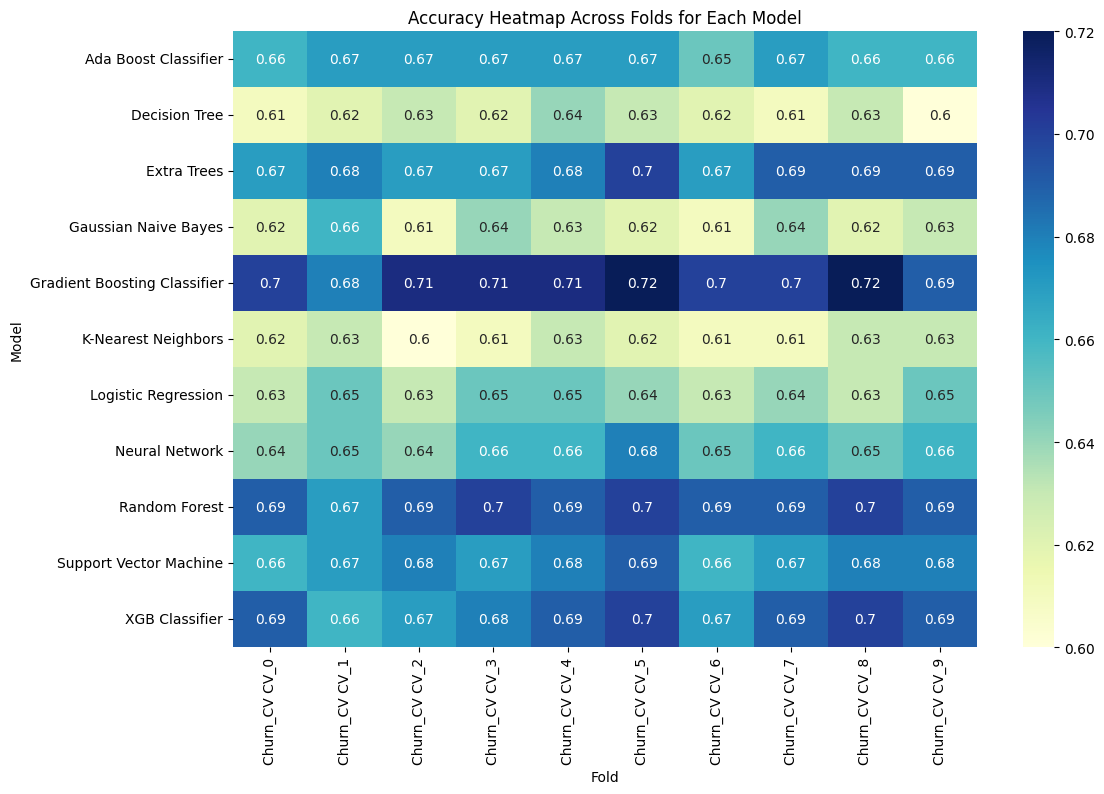

In [ ]:
data = {
    'Model': ['Neural Network', 'Logistic Regression', 'Support Vector Machine', 'Ada Boost Classifier',
              'Gradient Boosting Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes',
              'Extra Trees', 'Random Forest', 'Decision Tree', 'XGB Classifier'],
    'Churn_CV CV_0': [0.64, 0.63, 0.66, 0.66, 0.70, 0.62, 0.62, 0.67, 0.69, 0.61, 0.69],
    'Churn_CV CV_1': [0.65, 0.65, 0.67, 0.67, 0.68, 0.63, 0.66, 0.68, 0.67, 0.62, 0.66],
    'Churn_CV CV_2': [0.64, 0.63, 0.68, 0.67, 0.71, 0.60, 0.61, 0.67, 0.69, 0.63, 0.67],
    'Churn_CV CV_3': [0.66, 0.65, 0.67, 0.67, 0.71, 0.61, 0.64, 0.67, 0.70, 0.62, 0.68],
    'Churn_CV CV_4': [0.66, 0.65, 0.68, 0.67, 0.71, 0.63, 0.63, 0.68, 0.69, 0.64, 0.69],
    'Churn_CV CV_5': [0.68, 0.64, 0.69, 0.67, 0.72, 0.62, 0.62, 0.70, 0.70, 0.63, 0.70],
    'Churn_CV CV_6': [0.65, 0.63, 0.66, 0.65, 0.70, 0.61, 0.61, 0.67, 0.69, 0.62, 0.67],
    'Churn_CV CV_7': [0.66, 0.64, 0.67, 0.67, 0.70, 0.61, 0.64, 0.69, 0.69, 0.61, 0.69],
    'Churn_CV CV_8': [0.65, 0.63, 0.68, 0.66, 0.72, 0.63, 0.62, 0.69, 0.70, 0.63, 0.70],
    'Churn_CV CV_9': [0.66, 0.65, 0.68, 0.66, 0.69, 0.63, 0.63, 0.69, 0.69, 0.60, 0.69]
}

df = pd.DataFrame(data)

# Melt the dataframe to make it suitable for heatmap
melted_df = df.melt(id_vars='Model', var_name='Fold', value_name='Accuracy')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(melted_df.pivot("Model", "Fold", "Accuracy"), annot=True, cmap="YlGnBu")
plt.title('Accuracy Heatmap Across Folds for Each Model')
plt.show()

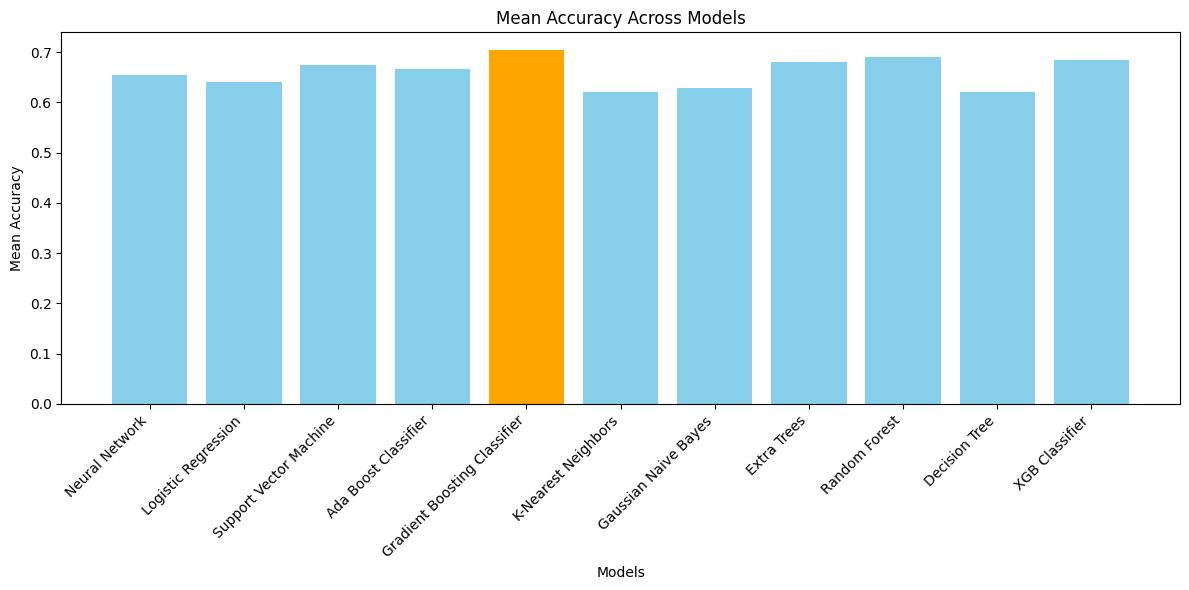

In [ ]:
# Data
models = ['Neural Network', 'Logistic Regression', 'Support Vector Machine', 'Ada Boost Classifier',
          'Gradient Boosting Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes',
          'Extra Trees', 'Random Forest', 'Decision Tree', 'XGB Classifier']

accuracy_data = [
    [0.64, 0.65, 0.64, 0.66, 0.66, 0.68, 0.65, 0.66, 0.65, 0.66],
    [0.63, 0.65, 0.63, 0.65, 0.65, 0.64, 0.63, 0.64, 0.63, 0.65],
    [0.66, 0.67, 0.68, 0.67, 0.68, 0.69, 0.66, 0.67, 0.68, 0.68],
    [0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.66],
    [0.70, 0.68, 0.71, 0.71, 0.71, 0.72, 0.70, 0.70, 0.72, 0.69],
    [0.62, 0.63, 0.60, 0.61, 0.63, 0.62, 0.61, 0.63, 0.63, 0.63],
    [0.62, 0.66, 0.61, 0.64, 0.63, 0.62, 0.61, 0.64, 0.63, 0.63],
    [0.67, 0.68, 0.67, 0.67, 0.68, 0.70, 0.67, 0.69, 0.69, 0.69],
    [0.69, 0.67, 0.69, 0.70, 0.69, 0.70, 0.69, 0.69, 0.70, 0.69],
    [0.61, 0.62, 0.63, 0.62, 0.64, 0.63, 0.62, 0.61, 0.63, 0.60],
    [0.69, 0.66, 0.67, 0.68, 0.69, 0.70, 0.67, 0.69, 0.70, 0.69]
]

# Calculate mean accuracy for each model
mean_accuracy = np.mean(accuracy_data, axis=1)

# Identify the model with the highest mean accuracy
best_model_index = np.argmax(mean_accuracy)
best_model = models[best_model_index]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(models, mean_accuracy, color=['skyblue' if model != best_model else 'orange' for model in models])
plt.title('Mean Accuracy Across Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()